In [6]:
import numpy as np 
import math
from __future__ import division # Import this to divide floats in python 2
from scipy import optimize as opt # for optimization
from scipy.constants.constants import C2K

#For plotting
from matplotlib.backends.backend_pdf import PdfPages


/Users/bmelosh/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [8]:


#Defining PT Condition calculators and depth simulator, 
#alternatively use a range of temperatures as a given depth and pressure

def pressure_calculator(depth, density): #depth in km, density in g/cm3
    g = 9.8 #gravity
    h = depth*1000 #converting to SI
    row = density*1000 #converting to SI
    pressure = (row*g*h)/1.0E6 # pressure in MPa
    return pressure 

def temperature_calculator(depths, geothermal_gradients): #km, C/km
    #np.array()
    for depth in depth_and_geothermal_gradients: 
        temp = geothermal_gradient*depth 
    return np.array(temp)
    
def depth_simulator(depth_range, density=2.7, geothermal_gradient=30): #depth range in km
    depth_conds = []
    for dep in range(depth_range[0], depth_range[1]):
        ptc = (round(pressure_calculator(dep, density)), temperature_calculator(geothermal_gradient, dep)) 
        depth_conds.append(ptc)
    return depth_conds


In [9]:
#Grain Size Simulator

class DifferentialStressCalculator():
    def __init__(self, grain_size, constant_b, exponent):
        self.constant_b = constant_b 
        self.grain_size = grain_size 
        self.exponent = exponent
    
    def calculate_differential_stress(self): 
        part = (math.log(self.grain_size)-math.log(self.constant_b))/self.exponent
        s = math.exp(part)
        return s

#Create grain size simulator
def simulate_grain_size(range_min, range_max):
    B = 2451 #2451 (holyoke 2010) #3631 (stipp 2003)
    m = -1.26 # 
    diffs = []
    for x in range(range_min,range_max):
        part = (math.log(x)-math.log(B))/m
        s = math.exp(part)
        diffs.append(s)
    return diffs 
      


In [13]:
#instantiating the class
shear_zone = DifferentialStressCalculator(grain_size=10, constant_b=B, exponent=m)
s = shear_zone.calculate_differential_stress()

print(s)

sgs = simulate_grain_size(5,12)
print(sgs)

78.75972939
[136.52648537471026, 118.13392985387905, 104.53031972346173, 94.01928064508654, 85.62876571387406, 78.75972939002484, 73.02185778474386]


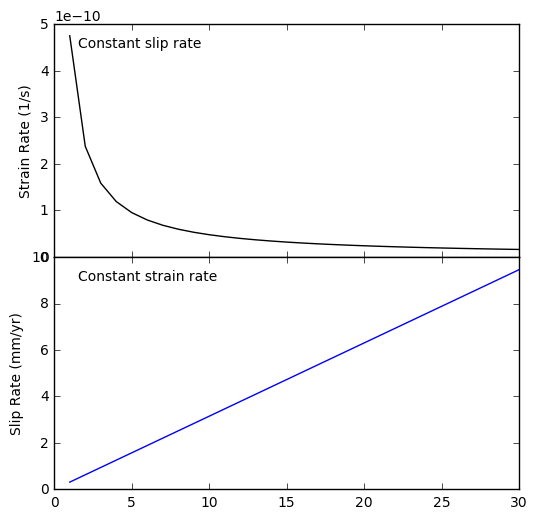

In [70]:
import matplotlib.pyplot as plt

def simulate_strain_rate(width_min, width_max): #constant stress condition
    v = 15
    e = []
    for x in range(width_min, width_max):
        strain_rate = (v/31536000)/(x*1000)
        e.append(strain_rate)
    return e

sr = simulate_strain_rate(1,31)

def simulate_slip_rate(width_min, width_max): #constant strain rate condition
    e = 1.0E-11
    v = []
    for x in range(width_min, width_max):
        slip_rate = (e*31536000)*(x*1000)
        v.append(slip_rate)
    return v

v = simulate_slip_rate(1,31)

#plot it up
x = range(1, 31)
fig = plt.figure(figsize=(6,6))

sub1 = fig.add_subplot(2,1,1)
sub1.text(1.5, 4.5E-10, 'Constant slip rate',size=10)
sub1.plot(x,sr, 'k-')
sub1.set_ylabel('Strain Rate (1/s)')

sub2 = fig.add_subplot(2,1,2)
sub2.text(1.5, 9, 'Constant strain rate',size=10)
plt.plot(x, v, 'b-')
sub2.set_ylabel('Slip Rate (mm/yr)')

#Share plot x axis
plt.setp(sub1.get_xticklabels(), visible=False)
plt.subplots_adjust(hspace = 0.001)

plt.show()

In [1]:


#Using the depth simulator, imput a tuple of depths in km
simulator_results = depth_simulator((15, 20))
print(simulator_results)
    

#These values are ready to go into Fugacity calculations



NameError: name 'depth_simulator' is not defined

In [16]:
#Input my pressure values and calculate temperature
pressure = pres_conv(400)

depth_and_gradient = [[15,16],[30,31]]
t = temperature_calculator(15, 30) #depth, geothermal gradient
print(t)
temperature = temp_conv(t)
print(pressure, temperature)


NameError: global name 'depth_and_geothermal_gradients' is not defined

In [25]:
#Using the depth simulator, input a tuple of depths in km
simulator_results = depth_simulator((10, 20)) #Input range of depths as tuple
print(simulator_results)

#Calculate fugacity for each depth or temperature set in simulator
fugacity = [] #set empty fugacity list
for pressure, temperature in simulator_results:
    
    
    def fun(v): #optimize for each PT value in array
        return eos(temp_conv(temperature), v)-pres_conv(pressure) #converts units
    volume = opt.brentq(fun, 5, 30)
    #print(volume)#print volume to show variability
    
    #calculate fugacity for each PT value now that volume is optimized
    fug = PSfug(pres_conv(pressure), temp_conv(temperature), volume)
    fugacity.append(fug)
    
print(fugacity)

[(265.0, 300), (291.0, 330), (318.0, 360), (344.0, 390), (370.0, 420), (397.0, 450), (423.0, 480), (450.0, 510), (476.0, 540), (503.0, 570)]
[73.32065665485717, 81.29473182614085, 89.79888484406439, 98.1030276584143, 106.54153609969205, 115.50341790663366, 124.1845439191434, 133.389935698497, 142.27103916048623, 151.67985520346446]


In [136]:
#Calculate a range of fugacities from range of temperatures at constant pressure

#Set pressure, convert to Pa.
pressure = 400000000#pres_conv(pressure_calculator(15, 2.7)) #Depth, density #400000000#
print(pressure)
#Set range of temperatures
temperature_range = range(400,502,25)
print(temperature_range)
temp_range = []
for t in temperature_range:
    tr = temp_conv(t)
    temp_range.append(tr)
    
print(temp_range)


#Calculate fugacity for each depth or temperature set in simulator
fugacity = [] #set empty fugacity list
for temperature in temp_range:
    
    coeff_table()#call coeff table for each temperature
    
    def fun(v): #optimize for each PT value in array
        return eos(temperature, v)-pressure
    volume = opt.brentq(fun, 5, 30)
       #print(volume)#print volume to show variability
    
    #calculate fugacity for each PT value now that volume is optimized
    fug = PSfug(pressure, temperature, volume)
    fugacity.append(fug)
    
print(fugacity)


400000000
[400, 425, 450, 475, 500]
[673.15, 698.15, 723.15, 748.15, 773.15]
[86.11912549447844, 101.03550845594113, 116.71651725233453, 132.99873222104716, 149.72095732050246]


In [18]:




temperature = np.array(temp_range) # made this into np array to be able to divide by float


def calculate_strain_rate(s, flow_law = 'H01'): #s is differential stress, defaults to using Hirth et al flow law
    e = (flow_laws[flow_law]['A']*np.power(s,flow_laws[flow_law]['n'])*np.power(fugacity,1)*np.exp(-flow_laws[flow_law]['Q']/(8.3144598*temperature)))
    return e

def calculate_slip_rate(e, w): #w: width in m, output of mm/yr
    width = w*1000
    v = width*31536000*e
    return v



#e = calculate_strain_rate(s, flow_law = 'H01')
#print(e)
#calculate_slip_rate(e, 30) ### output of mm/yr

#result = np.ndarray(shape=(len(flow_laws.keys()), len(e)), dtype=float)

# def all_flow_laws(s, w, flow_laws):
e = []
v = []
for key in flow_laws.keys():
    ei = calculate_strain_rate(s, flow_law=key)
    vi = calculate_slip_rate(ei, 30)
    ei = ei.tolist()
    e.append(ei)
    vi = vi.tolist()
    v.append(vi)
#     return e, v

        
def one_flow_law(s, w, flow_law='H01'):    
    e = calculate_strain_rate(s, flow_law = 'H01')
    print(e) #output of 1/s
    v = calculate_slip_rate(e, w) ### output of mm/yr
    print(v)
    
    
one_flow_law(s, 30)

#all_flow_laws(s, 30, flow_laws=flow_laws)
    
    
# for key in flow_laws.keys():
#     print(key)
#     e = calculate_strain_rate(s, flow_law=key)
#     v = calculate_slip_rate(e, 30)
#     print(e)
#     print(v)
    


temperature = temp_conv(temperature, direction="K2C")

import pprint


#pprint.pprint(v)
# pprint.pprint(v[5])
# flow_laws.keys()
# print(flow_laws)
# flow_laws.keys()


NameError: name 'temp_range' is not defined

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
#from matplotlib.lines import Line2D

fig = plt.figure()

colors = iter(cm.gray(np.linspace(0, 1, len(e))))#set color ramp to jet with a line spacing of length e
markers=['o', 'v', '^', '<', '>', '8', 's', 'D', '.']# ',', '+', '4', '.', 'o', '*', 'v', 'D', 's']
lstyles=[':', '-.', '--', '-', ':', '-.', '--', '-',':' ]



colors = iter(cm.gray(np.linspace(0, 1, len(e))))#set color ramp to jet with a line spacing of length e
 
labels = []
# for key in flow_laws.keys():
#     l = key
#     labels.append(l)
#     for i in e:
#         plt.plot(temperature, e[i], color=next(colors))


for key in flow_laws.keys():
    l = key
    labels.append(l)

for i in range(0, len(e)):
    plt.plot(temperature, e[i], color=next(colors), linestyle=lstyles[i] )#marker=markers[i], 

    
plt.xlabel('Temperature ( C)')
plt.ylabel('Strain Rate (1/s)')
plt.title('Flow Laws')
#for i in range(0, len(Tc)):
 #   plt.text(450,e[i][6],labels[i], fontsize=10, rotation = 8)
plt.legend(labels, fontsize=10, loc=4)
#plt.grid()
plt.show()

pdf = PdfPages('StrainRates.pdf')
pdf.savefig(fig)
pdf.close()



/Users/bmelosh/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


NameError: name 'np' is not defined

In [17]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()

colors = iter(cm.gray(np.linspace(0, 1, len(v))))#set color ramp to jet with a line spacing of length e
lstyles=[':', '-.', '--', '-', ':', '-.', '--', '-',':' ]

plt.gca().set_yscale('log') #set y axis to log 
 
labels = []
for key in flow_laws.keys():
    l = key
    labels.append(l)

for i in range(0, len(v)):
    plt.plot(temperature, v[i], color=next(colors), linestyle=lstyles[i] )
    
# y=[20,20, 20]
# x=[400, 450, 500]
# plt.plot(x, y, linestyle='-', linewidth=8)

    
plt.xlabel('Temperature ( C)')
plt.ylabel('Velocity (mm/yr)')
plt.title('Slip Rates')
#for i in range(0, len(Tc)):
 #   plt.text(450,e[i][6],labels[i], fontsize=10, rotation = 8)
plt.legend(labels, fontsize=10, loc=4)
#plt.grid()
plt.show()

pdf = PdfPages('SlipRates.pdf')
pdf.savefig(fig)
pdf.close()

#pdf = matplotlib.backends.backend_pdf.PdfPages("output.pdf")

NameError: name 'v' is not defined

In [1]:
#Double checking calculations

s = 84

T = temp_conv(450)

x = np.power(s,4)
y = np.power(300,1)
z = np.exp(-135000/(8.3144598*T))
e = 6.3E-12*x*y*z
v = 30000*31536000*e

#how to write a test!
def test_calculate_slip_rate():
    w = 30000
    e = 2.043722042401592e-11
    slip_rate = calculate_slip_rate(e, w)
    assert slip_rate == 19.335245498752982
test_calculate_slip_rate()

NameError: name 'temp_conv' is not defined

In [139]:

pressure_range = range(300, 602, 25)

pres_range = []
for p in pressure_range:
    pr = pres_conv(p)
    pres_range.append(pr)

#Set range of temperatures
temperature_range = range(300,602,25)

temp_range = []
for t in temperature_range:
    tr = temp_conv(t)
    temp_range.append(tr)

pressure = 400000000
#temperature = 723.15
    
    
    
#Optimizing equation to solve for volume
def fugacity_calculator(pressure, temperature):

    def fun(v):
        return eos(temperature, v)- pressure
    volume = opt.brentq(fun, 5, 30) #Volume in cc/mol

    #Calculate fugacity 
    fugacity = PSfug(pressure, temperature, volume)
    print(fugacity)
    
    return fugacity

# for temperature in temp_range:
#         fugacity_calculator()

#fugacity_calculator([400000000, 300000000], [723, 623])

fugacity_calculator(400000000, 723)




116.726012438


116.72601243785924

/Users/bmelosh/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


IndexError: list index out of range

In [79]:
#Save figure to pdf
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('SlipRatesNEW.pdf') as pdf:
    pdf.savefig()  # saves the current figure into a pdf page

ValueError: No such figure: None